<a href="https://colab.research.google.com/github/n-vit/YaP_Projects/blob/main/3_%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Финальный-отзыв" data-toc-modified-id="Финальный-отзыв-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Финальный отзыв</font></a></span></li><li><span><a href="#Общий-отзыв" data-toc-modified-id="Общий-отзыв-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общий отзыв</font></a></span></li></ul></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Задача исследования - определить параметры, влияющие на рыночную стоимость объектов недвижимости. Делать мы это будем на основе исследования данных из объявлений, данных в Яндекс.Недвижимость, в Санкт-Петербурге и пригородах. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    df_realt = pd.read_csv('/content/drive/MyDrive/real_estate_data.csv', sep= '\t')
except:
    df_realt = pd.read_csv('/datasets/real_estate_data.csv', sep= '\t')

In [ ]:
df_realt.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


удалим явные дубликаты и строки, в которых пропущены все значения (если они есть)

In [ ]:
df_realt.duplicated().sum()

0

In [ ]:

#df_realt = df_realt.dropna(how='all')
#df_realt = df_realt.drop_duplicates().reset_index(drop= True)

In [ ]:
df_realt.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
df_realt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

посмотрим на уникальные значения в int и obgect, и статистическое описание int и float, опишем задачи по предобработке для каждого из параметров 

In [ ]:
df_realt['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [ ]:
df_realt.describe().T


,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [ ]:
df_realt.describe(include = ['object'])

,first_day_exposition,is_apartment,locality_name
count,23699,2775,23650
unique,1491,2,364
top,2018-02-01T00:00:00,False,Санкт-Петербург
freq,368,2725,15721


### Вывод

Датасет требует предобработки для дальнейшего анализа, в т.ч.:

- [x] airports_nearest — расстояние до ближайшего аэропорта в метрах (м). Содержит пропуски данных, оставим их незаполненными, т.к. без геоданных восстановить значение невозможно, а корреляция с ценой незначительная (0,27)
- [x] balcony — число балконов. Заполняется по данным пользователя, Содержит пропуски данных. Скорее всего если нет количества балконов, значит их нет ни одного
- [x] ceiling_height — высота потолков (м). содержат статистические выбросы (мах 100м), и пропущенные данные. заполняется пользователем. Если значимые ячейки будут расположены "кучно" - возьмем для пропусков медиану
- [x] cityCenters_nearest — расстояние до центра города (м) -  имеют пропуски, корреляция с ценой кв. метра довольно высокая (0,38) но заполнить пропуски не чем. это не ошибки пользователей, геоданные отсутствуют. 
- [x] days_exposition — сколько дней было размещено объявление (от публикации до снятия) - содержат пропуски, статистические выбросы, требуют перевода в формат целых чисел
- [x] first_day_exposition — дата публикации - хранится в формате object, для обработки переведем в формат дат
- [x] floor — этаж, вероятно корректные данные
- [x] floors_total — всего этажей в доме - имеют незначительное количество пропусков, если не влияют на выводы, могут быть удалены из анализа
- [x] is_apartment — апартаменты (булев тип)- большинство строк содержит пропуски, которые могут быть заполнены False поскольку сет изначально собирался как информация о жилой недвижимости
- [x] kitchen_area — площадь кухни в квадратных метрах (м²) - содержит статистические выбросы, пропущенные значения 10% от датафрейма (возможно - свободная планировка)
- [x] last_price — цена на момент снятия с публикации. медиана сильно отличается от среднего, уберем стат. выбросы
- [x] living_area — жилая площадь в квадратных метрах (м²). содержит пропуски и возможно стат. выбросы
- [x] locality_name — название населённого пункта - содержит пропуски, возможно пропущенные значения вообще не относятся к географии сета. удалим.
- [x] open_plan — свободная планировка (булев тип) - выглядит корректно
- [x] parks_around3000 — число парков в радиусе 3 км - необходимо перевести из вещественных чисел в целые. Вероятно столбец заполнялся пользователями и пропуски можно заполнить нулевыми значениями, если parks_nearest больше 3000. 
- [x] parks_nearest — расстояние до ближайшего парка (м) - содержит пропуски, заполнено на основе геоданных. Восстановление пропусков не требуется, корреляция с ценой квадратного метра слабая (0,07)
- [x] ponds_around3000 — число водоёмов в радиусе 3 км аналогично паркам
- [x] ponds_nearest — расстояние до ближайшего водоёма (м) аналогично паркам. Пропуски не заполняем, корреляция со стоимостью квадратного метра слабая (0,07)
- [x] rooms — число комнат - возможно содержит выбросы, проверить корреляцию с площадью и ценой
- [x] studio — квартира-студия (булев тип) - выглядит корректно
- [x] total_area — площадь квартиры в квадратных метрах (м²) вероятны стат. выбросы, все данные заполнены
- [x] total_images — число фотографий квартиры в объявлении - выглядит корректно

## Предобработка данных

Балконы и аппартаменты: если в числе балконов пропуск, то наверное их нет. А если нет ответа на вопрос - это аппартаменты? то скорее всего это не аппартаменты


In [ ]:
df_realt['balcony'] = df_realt['balcony'].fillna(0) #заполняем пропущенные данные о балконах нулями
df_realt['is_apartment'] = df_realt['is_apartment'].fillna(False) #если не указано что объект аппартаменты - ставим False

<div style="border:solid green 2px; padding: 20px"> <b>Отлично:</b><br>
    Окей, согласна.</div>       

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 

Оценим стат. выбросы в данных об общей площади ~~и избавимся от них **а избавляться от них не будем**. 5% выборки это немало, пусть живут~~ . 


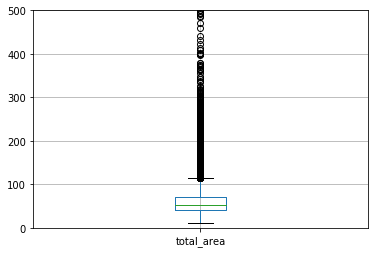

23


In [ ]:
plt.ylim(0, 500)
df_realt.boxplot(column='total_area')
plt.show()

print(df_realt.loc[df_realt.loc[:, 'total_area'] > 400]['total_area'].count()) # выбросы менее 5% выборки. 
#df_realt = df_realt.loc[df_realt.loc[:, 'total_area'] < 400] 

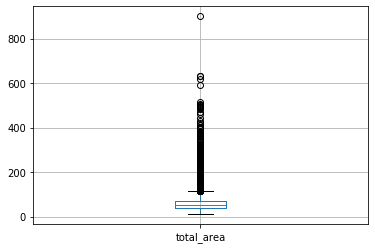

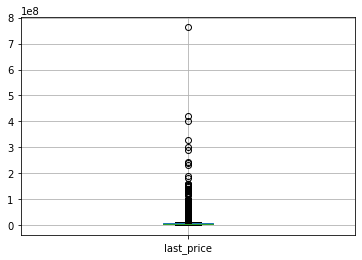

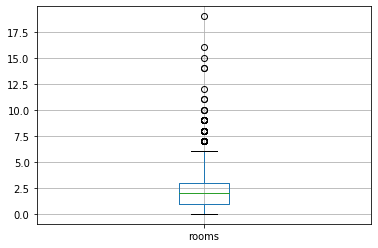

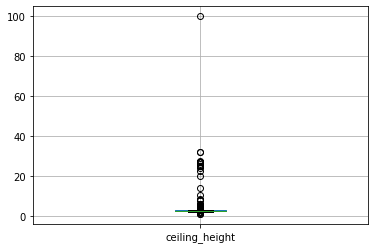

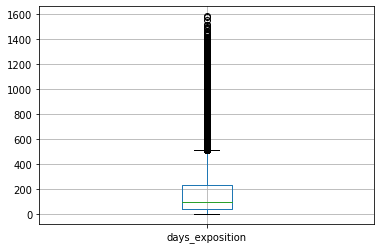

In [ ]:
#Код ревьюера
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition'] 
for col in columns:
    df_realt.boxplot(column=col); 
    plt.show()

Проверим корреляцию между жилой и общей площадью, и если она близка к единице - заполним пропуски в жилой площади с помощью коэффициента зависимости жилой площади от общей

In [ ]:
df_realt['living_area'].corr(df_realt['total_area']) # корреляция жилой и общей площади - 94%, практически линейная зависимость
# заполним пропуски значениями общей площади, умноженной на отношение медиан жилой и общей площади
df_realt['living_area'] = df_realt['living_area'].fillna(df_realt['total_area'] 
                                                                 * df_realt['living_area'].median() 
                                                                 / df_realt['total_area'].median())                                                       


<div style="border:solid green 2px; padding: 20px"> <b>Отлично:</b><br>
  Это удобный вариант в данном случае. Согласна :)</div>

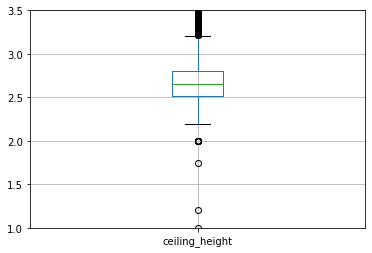

число стат. выбросов: 91


In [ ]:
plt.ylim(1, 3.5)
df_realt.boxplot(column='ceiling_height')
plt.show()
print('число стат. выбросов:', df_realt.query('ceiling_height < 2.3 | ceiling_height > 4')['last_price'].count())
#df_realt = df_realt.query('ceiling_height >=2.3 & ceiling_height <= 4')

In [ ]:
df_realt['ceiling_height'] = df_realt['ceiling_height'].fillna(df_realt.groupby(['floors_total'])['ceiling_height'].transform('median'))
df_realt['ceiling_height'].isna().sum()

78

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px">

Интересно. В прошлом проекте заполнял пропуски медианой для выбранной группы c помощью `transform`, а тут не додумался, что высота потолков действительно обычно зависит от этажности. Включил твой код
Если бы была информация о годе постройки дома - можно было бы вообще очень точно восстановить, потому что потолки в сталинских и хрущевских пятиэтажках сильно отличаются. 
    
например так:
    `data['ceiling_height'] = data.groupby(['floors_total', 'year_construction'])['ceiling_height'].transform(lambda x: x.fillna(x.mean()))`
    
сработало бы?

<div style="border:solid green 2px; padding: 20px"> <b>Отлично V2:</b><br>
   Да, но к сожалению имеем то, что имеем. Спасибо за правки!</div>       
<br>

дату первой публикации приведем в удобный формат

In [ ]:
df_realt['first_day_exposition']  = pd.to_datetime(df_realt['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

разберемся с площадью кухни: в данных есть пропуски. Если в помещении свободная планировка, то их не нужно заполнять - площадь кухни определит будущий владелец, а если планировка фиксированная - то восстановим данные по отношению медиан площади кухни и общей площади жилья

In [ ]:
df_realt['kitchen_area'] = df_realt.query('studio == False')['kitchen_area'].fillna(df_realt['total_area'] 
                                                                 * df_realt['kitchen_area'].median() 
                                                                 / df_realt['total_area'].median())
df_realt['kitchen_area'].isna().sum()

149

Посмотрим на срок размещения объявления: 
- заполним пропуски, посчитав дни от информации в first_day_exposition. Даты снятия объявления нет, за конец размещения будем брать последнюю дату в first_day_exposition 
- переведем в целые числа (дни)
- удалим выбросы: если объект не размещался ни одного дня, или слишком долго размещается - вероятно цена не была рыночной)

~~В итоге мы сократили выборку почти наполовину, но объявления, которые висят больше полутора лет без движения - вряд-ли характеризуют рыночную цену. Все на пользу.~~
<div class="alert alert-info" style="border:solid blue 2px; padding: 20px">
Попробую максимально сохранить датафрейм, и поработать с комментариями:

Чтобы сделать сводную таблицу для дня размещения вытащим из аналитической части сюда категоризацию данных о дне размещения, потом посмотрим свод по годам


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px">
Добавляем категории для первого дня размещения

In [ ]:
df_realt['weekday'] = df_realt['first_day_exposition'].dt.weekday
df_realt['month'] = df_realt['first_day_exposition'].dt.month
df_realt['year'] = df_realt['first_day_exposition'].dt.year 

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px">
Смотрим на количество данных в размещениях по годам - в 2019-м много "незакрытых" объявлений. Ниже мы увидим что выборка включает только часть года

In [ ]:
df_realt.pivot_table(index=['year'], 
                              values=['days_exposition', 'last_price'], 
                              aggfunc='count')

,days_exposition,last_price
year,,
2014,119,137
2015,1121,1191
2016,2716,2783
2017,7919,8190
2018,7560,8519
2019,1083,2879


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px">
Нужны ли нам незакрытые объявления? с одной стороны они содержат информацию о рынке (по мнению продавца), с другой стороны - последняя цена по таким объявлениям может меняться, а значит оставлять их во фрейме тоже не очень честно. 

посчитаем количество пропусков 

In [ ]:
df_realt['days_exposition'].isna().sum()

3181

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px">
больше двух тысяч объявлений с недостоверной финальной ценой. я бы их удалил, но ты говоришь что нельзя сильно кромсать фрейм. Предположим что все эти люди в целом адекватно оценивают свою недвижимость и цену можно считать рыночной. 

Пропуски во времени экспозиции заполним, посчитав за время экспозиции разницу между стартом размещения и последним днем записи в датафрейм. 
    
Статистические выбросы  тут все-же удалим. Нельзя делать выводы о цене недвижки, по объектам, которые висят почти два года без движения

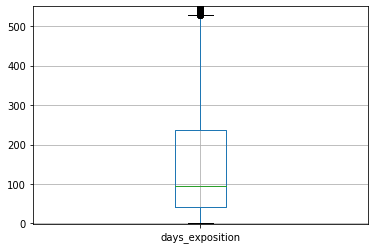

количество статистических выбросов по времени размещения: 1947


In [ ]:
df_realt['days_exposition'] = df_realt['days_exposition'].fillna((df_realt['first_day_exposition'].max() 
                                                                    - df_realt['first_day_exposition']).dt.days)# заполняем пропуски в днях экспозиции
df_realt['days_exposition'].astype('int')

plt.ylim(-1, 550) 
df_realt.boxplot(column='days_exposition')
plt.show()#определяем границы нормального размаха

print('количество статистических выбросов по времени размещения:',
     df_realt.query('days_exposition < 0 | days_exposition > 530')['last_price'].count())

#df_realt = df_realt.query('days_exposition > 0 & days_exposition < 530') #удаляем выбросы

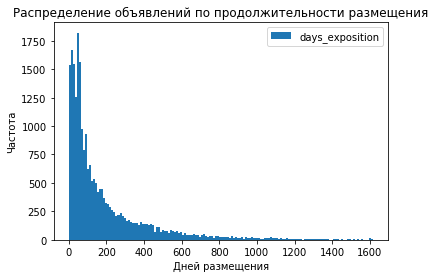

In [ ]:
df_realt.plot(y= 'days_exposition', kind= 'hist', bins= 150)
plt.title('Распределение объявлений по продолжительности размещения')
plt.xlabel('Дней размещения')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px">

**Mission completed!**
    
Гистограмма по дням размещения была в аналитическом блоке, поднимем ее сюда, выше добавил сводную таблицу по годам:

Чаще всего квартиры продаются в первые два-три месяца после размещения. У гистограммы длинный хвост - это выбросы, которые мы не стали убирать чтобы сохранить фрейм



<div style="border:solid green 2px; padding: 20px"> <b>Отлично V2:</b><br>
  Благодарю 🙂 Кстати тут на гистограмме есть несколько пиков - примерно через 50, 60 и 90 дней после начала продажи. Возможно, это связанно с автоматическим снятием объявления с продажи.</div>       
<br>

Посчитаем пропущенные данные  о количестве водоемов рядом. Если расстояние до воды меньше 3 км, поставим единицу в пропуске. Если больше - 0. То же сделаем для парков. 

In [ ]:
def ponds_dist(row):  
  dist = row['ponds_nearest']
  ponds = row['ponds_around3000']
  if dist < 3000:
    if ponds not in [ 1., 2., 3.]:
      return 1 #если расстояние ближе 3 км, и нет информации о количестве
    else: #если расстояние ближе 3 км, и указано количество 
      return ponds
  else:
    return 0 # если расстояние больше 3000 м

def parks_dist(row):
  dist = row['parks_nearest']
  parks = row['parks_around3000']
  if dist < 3000:
    if parks not in [ 1., 2., 3.]:
      return 1
    else:
      return parks
  else:
    return 0
    
df_realt['ponds_around3000'] = df_realt.apply(ponds_dist, axis= 1)
df_realt['parks_around3000'] = df_realt.apply(parks_dist, axis= 1)
df_realt.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             78
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              149
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
weekday                     0
month                       0
year                        0
dtype: int64

C пропусками закончили. Остались незаполняемые пропуски в машинных данных и пропуски в площади кухни, для объектов со свободной планировкой. 

~~Оставим в выборке статистически значимые объекты с ценой от 120 тыс. до 10,5 млн. руб. Фрейм лишится еще 729 строк. ~~
<div class="alert alert-info" style="border:solid blue 2px; padding: 20px">
    
Не будем убирать стат. выбросы, просто посчитаем их


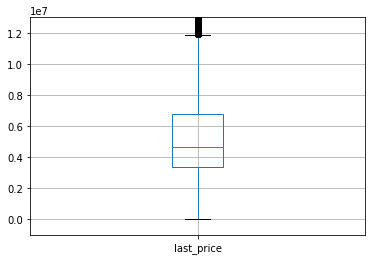

2525


In [ ]:
plt.ylim(-1000000, 13000000)
df_realt.boxplot(column='last_price')
plt.show()
print(df_realt.query('last_price > 10500000 | last_price < 120000')['last_price'].count())
#df_realt = df_realt.query('last_price <= 10500000 | last_price >= 120000')

~~И уберем статвыбросы из данных о количестве комнат, оставив статистически значимые объекты от 1 до 4. Лишних строк оказалось всего семь~~
<div class="alert alert-info" style="border:solid blue 2px; padding: 20px">
И тут тоже посчитаем, но чистить не будем
    

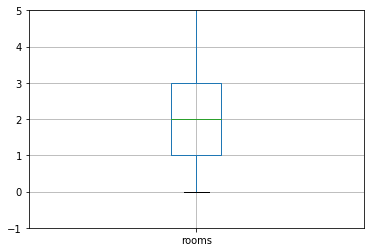

718


In [ ]:
plt.ylim(-1, 5)
df_realt.boxplot(column='rooms')
plt.show()
print(df_realt.query('rooms > 4 | rooms < 1')['last_price'].count())
#df_realt = df_realt.query('rooms <= 4 | rooms >= 1')

Приведем к целым числам информацию о количестве балконов, прудов, парков, этажей и дней размещения. 

In [ ]:
df_realt['floor'] = df_realt['floor'].astype('int')
df_realt['balcony'] = df_realt['balcony'].astype('int')
df_realt['parks_around3000'] = df_realt['parks_around3000'].astype('int')
df_realt['ponds_around3000'] = df_realt['ponds_around3000'].astype('int')
df_realt['days_exposition'] = df_realt['days_exposition'].astype('int')

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
И оптимизируем разрядность числовых данных в нашем фрейме

In [ ]:
df_float = df_realt.select_dtypes(include=['float']) # выбираем данные с плавающей точкой
df_float = df_float.apply(pd.to_numeric,downcast='float') # и понижаем их разрядность до приемлемой

df_int = df_realt.select_dtypes(include=['int']) # то же для цельночисленных
df_int = df_int.apply(pd.to_numeric,downcast='unsigned')

In [ ]:
df_realt[df_int.columns] = df_int # меняем в исходном фрейме данные на оптимизированные
df_realt[df_float.columns] = df_float
df_realt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23699 non-null uint8
last_price              23699 non-null float32
total_area              23699 non-null float32
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null uint8
ceiling_height          23621 non-null float32
floors_total            23613 non-null float32
living_area             23699 non-null float32
floor                   23699 non-null uint8
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23550 non-null float32
balcony                 23699 non-null uint8
locality_name           23650 non-null object
airports_nearest        18157 non-null float32
cityCenters_nearest     18180 non-null float32
parks_around3000        23699 non-null uint8
parks_nearest           8079 non-null float32
ponds_around

<div style="border:solid green 2px; padding: 20px"> <b>Отлично:</b><br>
    Отлично, перевели данные в нужный тип.</div>       

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
ОК, удалил только самые критичные на мой взгляд выбросы - во времени размещения. т.к. нам интересны объекты которые продаются, а те которые аномально долго висят без движения - как раз  
    
**не продаются**. 

In [ ]:
data_filtered = df_realt.query('last_price > 100000 \
                                and last_price < 20000000 \
                                and ceiling_height > 1.5 \
                                and ceiling_height < 4 \
                                and total_area <= 400')
print('Мы удалили', df_realt['last_price'].count() - data_filtered['last_price'].count(), 'выбросов')
df_realt = data_filtered

Мы удалили 890 выбросов


# Вывод по итогам предобработки:
В исходном датафрейме содержалось много объектов, составляющих статистические выбросы по цене, площади, количеству комнат или высоте потолков. Поскольку мы готовим инструмент, позволяющий оценивать недвижимость по рыночным критериям, строками с выбросами пришлось пожертвовать, из-за чего фрейм сократился почти вдвое. 

Объекты из 19 комнат, с ценой более 15 млн., стометровыми потолками или сроком размещения больше двух лет- вероятно действительно существует, и их множество, но спрос на них ограничен и может сильно отличаться от статистически достоверной выборки. 

Технические ошибки, например незаполненные данные по количеству балконов, прудов и парков, а так же пропуски в информации о высоте потолков и площади кухни (если планировка не свободная) - были заполнены. 
В части данных пропуски не мешают дальнейшему анализу (геоданные, пропуски площади кухни в студиях), поэтому они оставлены во фрейме

## Расчёты и добавление результатов в таблицу

Добавим для каждого объекта цену за квадратный метр

In [ ]:
df_realt['unit_price'] = df_realt['last_price'] / df_realt['total_area']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Добавим  день недели, месяц и год публикации объявления 

Сгруппируем данные по этажам

In [ ]:
df_realt['floors_group'] = ''
def floors_sort(row): #функция принимает строку и возвращает одну из трех групп- первый (0), последний (2), другой (1)
  floors_total = row['floors_total']
  floor = row['floor']
  if floor == 1:
    return 'первый'
  elif (floors_total - floor) == 0:
    return 'последний'
  else:
    return 'другой'

df_realt['floors_group'] = df_realt.apply(floors_sort, axis= 1)
df_realt['floors_group'].unique()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


array(['другой', 'первый', 'последний'], dtype=object)

Добавим  для каждого объекта соотношение жилой и общей площади, а также отношение площади кухни к общей


In [ ]:
df_realt['ratio_living'] = df_realt['living_area'] / df_realt['total_area']
df_realt['ratio_kitchen'] = df_realt['kitchen_area'] / df_realt['total_area']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Вывод:
мы добавили данные, которые упростят дальнейший анализ:
- определили цену квадратного метра
- сгруппировали информацию по этажам
- добавили информацию по месяцам, дням и годам

<div style="border:solid green 2px; padding: 20px"> <b>Отлично:</b><br>
  Отлично, произвели расчеты и  провели категоризацию по этажам. </div

## Исследовательский анализ данных

Выделим в отдельный фрейм данные, которые помогут нам выявить зависимости. Ключевой параметр оценки недвижимости - цена за квадратный метр. Именно по ней можно сравнивать схожие объекты. 

Выясним как влияют на цену метра: площадь, количество комнат, высота потолков, этаж, удаленность от центра, наличие парков и водоемов рядом, доля площади кухни.  Чтобы оценить взаимную зависимость параметров, построим матрицу гистограмм и посчитаем коэффициенты корреляции

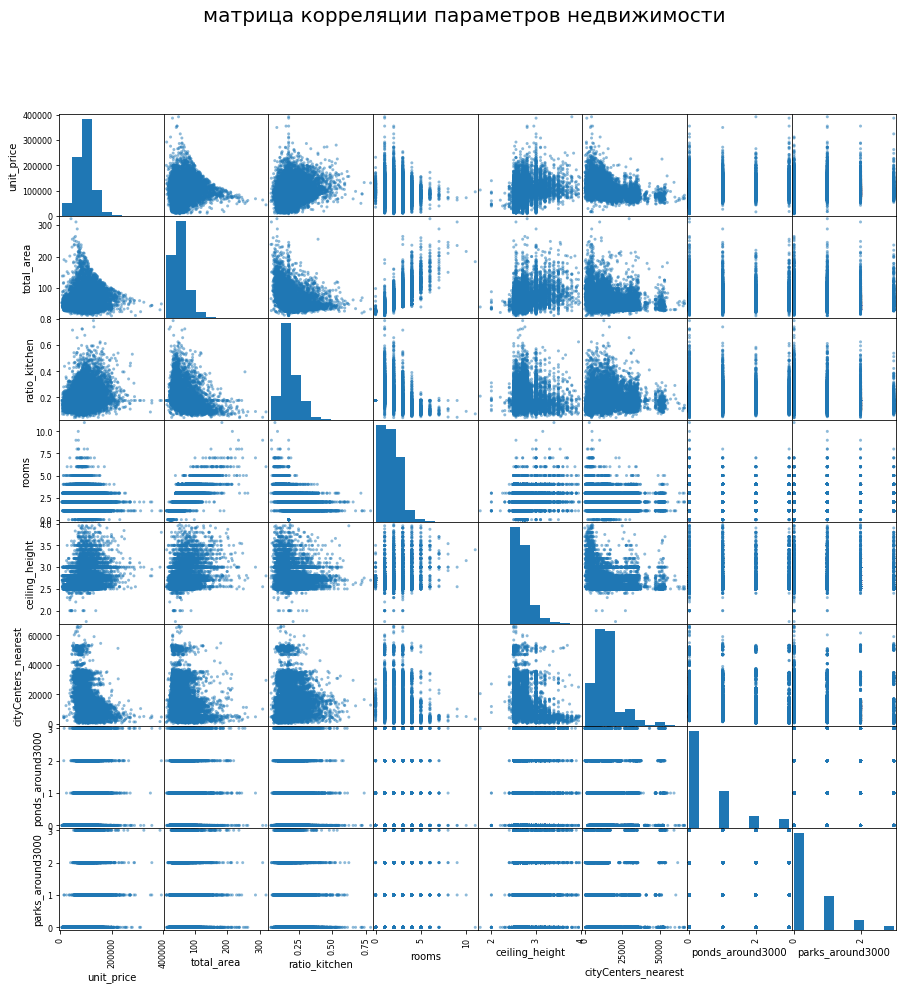

In [ ]:
main_realt = df_realt[['unit_price', 'total_area', 'ratio_kitchen', 'rooms', 'ceiling_height', 'floors_group', 'cityCenters_nearest', 'ponds_around3000', 'parks_around3000']]
pd.plotting.scatter_matrix(main_realt, figsize=(15, 15)) 
plt.suptitle('матрица корреляции параметров недвижимости', size=20)
plt.show()

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
Спасибо, стало удобнее

In [ ]:
main_realt.corr()

,unit_price,total_area,ratio_kitchen,rooms,ceiling_height,cityCenters_nearest,ponds_around3000,parks_around3000
unit_price,1.000000,0.050692,0.253747,-0.131016,0.267942,-0.388483,0.296868,0.280459
total_area,0.050692,1.000000,-0.348573,0.797985,0.356761,-0.194944,0.161855,0.151116
ratio_kitchen,0.253747,-0.348573,1.000000,-0.586907,0.053379,0.008655,-0.005422,-0.072307
rooms,-0.131016,0.797985,-0.586907,1.000000,0.165076,-0.141985,0.083124,0.115978
ceiling_height,0.267942,0.356761,0.053379,0.165076,1.000000,-0.283011,0.210953,0.216329
cityCenters_nearest,-0.388483,-0.194944,0.008655,-0.141985,-0.283011,1.000000,-0.044241,-0.136709
ponds_around3000,0.296868,0.161855,-0.005422,0.083124,0.210953,-0.044241,1.000000,0.381974
parks_around3000,0.280459,0.151116,-0.072307,0.115978,0.216329,-0.136709,0.381974,1.000000


In [ ]:
main_realt.describe()

,unit_price,total_area,ratio_kitchen,rooms,ceiling_height,cityCenters_nearest,ponds_around3000,parks_around3000
count,22809.000000,22809.000000,22664.000000,22809.000000,22809.000000,17334.000000,22809.000000,22809.000000
mean,94702.851562,56.613895,0.187040,2.008768,2.692649,14516.354492,0.561489,0.443334
std,32454.347656,24.556509,0.068902,0.984451,0.203005,8568.840820,0.858704,0.723988
min,7962.962891,12.000000,0.042810,0.000000,1.750000,208.000000,0.000000,0.000000
25%,75757.578125,40.000000,0.137931,1.000000,2.550000,9857.000000,0.000000,0.000000
50%,93997.734375,51.000000,0.175000,2.000000,2.650000,13285.000000,0.000000,0.000000
75%,111989.460938,67.000000,0.225504,3.000000,2.750000,16464.000000,1.000000,1.000000
max,392354.125000,320.000000,0.787879,11.000000,3.980000,65968.000000,3.000000,3.000000


**По ключевым параметрам можно выделить следующие закономерности:**

1. Цена за квадратный метр почти не зависит от общей площади недвижимости, а вот с ростом относительной площади кухни (доли кухни) - цена за метр меняется - чем больше кухня, тем дороже цена, правда это актуально для доли кухни в диапазоне 0,2-0,4 от общей площади. Площадь большинства объектов от 40 до 65 кв. метров.  

Неожиданная закономерность: чем ближе к центру, тем больше вариативность площади объектов


2. Трехметровые потолки ценятся заметно выше, но большинство объектов с потолками 2,6-2,7м. 

3. Расстояние до центра влияет на цену особым образом: ~~корреляция довольно высокая, 0,38~~. 
<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
    Цена за метр больше всего коррелирует с удаленностью от центра, хотя в целом корреляция цены с числовыми параметрами слабая или очень слабая.
    
Но при этом видно, что в зоне 0-20 км зависимость гораздо выше, а для более удаленных объектов растояние до центра становится менее значимым фактором. Есть смысл изучить подробнее. 

4. Наличие парка или водоема рядом положительно влияют на цену за метр, а вот их количество не имеет особого значения. 

5. Двушки - самый популярный сегмент, тут можно встретить и самую низкую, и самую высокую цену за метр. 

Минимальная цена на свободную планировку выше, чем на разделенные на комнаты объекты (правда возможно, что это влияние других факторов, например года постройки, по которому у нас нет данных)




Кроме цены за метр недвижимость стоит сравнивать так же по ликвидности. Выясним, какие объекты продаются быстрее. 

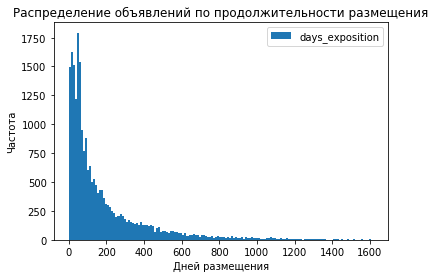

In [ ]:
df_realt.plot(y= 'days_exposition', kind= 'hist', bins= 150)
plt.title('Распределение объявлений по продолжительности размещения')
plt.xlabel('Дней размещения')
plt.ylabel('Частота')
plt.show()

In [ ]:
df_realt['days_exposition'].describe()

count    22809.000000
mean       181.246394
std        227.304865
min          0.000000
25%         42.000000
50%         92.000000
75%        230.000000
max       1618.000000
Name: days_exposition, dtype: float64

Наиболее часто объекты продаются в интервале от 1 до 80 дней, причем многие - в первый день после размещения. 

Объекты, которые не продаются дольше 186 дней от размещения объявления можно считать статистически "медленными" Возможно они имеют очень узкий спрос или не рыночную цену. 

В чек листе есть вопрос: "зависит ли цена от даты размещения?". На основе имеющихся данных на него нельзя ответить, т.к. у нас есть только последняя цена, перед закрытием объявления, и мы не видим цену в дату размещения. 

Зато мы можем посмотреть насколько время размещения влияет на скорость продажи:

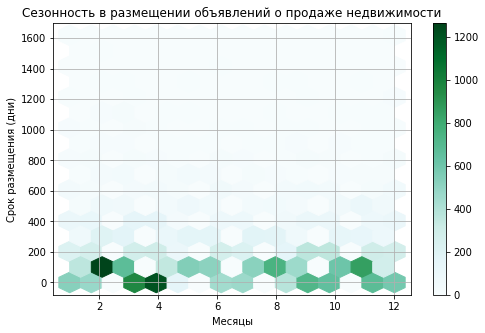

In [ ]:
df_realt.plot(x='month', y='days_exposition', kind='hexbin', gridsize=15
              , figsize=(8, 5), sharex=False, grid=True)
plt.title('Сезонность в размещении объявлений о продаже недвижимости')
plt.xlabel('Месяцы')
plt.ylabel('Срок размещения (дни)')
plt.show()

<div style="border:solid green 2px; padding: 20px"> <b>Отлично:</b><br>
  
Здорово, что для визуализации ты решил применить hexbin plot 🔥 </div>      

Лучшее время для сделок с недвижимостью - ранняя весна. Большинство сделок происходит с февраля по апрель. 

В какой день недели лучше давать объявление? Выделим объекты, которые размещались не более недели (ушли быстро), и оценим зависимость от даты публикации объявления:


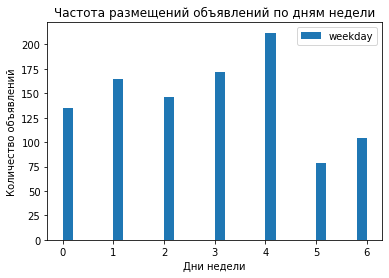

In [ ]:
qick_deal = df_realt.query('days_exposition < 8')
qick_deal.plot(y= 'weekday', kind= 'hist', bins= 30)
plt.title('Частота размещений объявлений по дням недели')
plt.xlabel('Дни недели')
plt.ylabel('Количество объявлений')
plt.show()

Большинство объектов, проданных в первую неделю размещения были опубликованы в середине рабочей недели (вторник-четверг). В выходные активность заметно ниже. 

In [ ]:
df_realt.groupby('year')['total_area'].count() #крличество размещенных объявлений в каждый год

year
2014     117
2015    1107
2016    2659
2017    7884
2018    8273
2019    2769
Name: total_area, dtype: int64

In [ ]:
df_realt['first_day_exposition'].max() #последнее размещенное объявление

Timestamp('2019-05-03 00:00:00')

По данным о ежегодном количестве объявлений нельзя делать выводы об объемах рынка недвижимости, но можно с уверенностью сказать, что наш сервис активно развивался с 2015 по 2019 год. Последнее размещенное объявление датировано 2 мая 2019 года. - пик размещений уже прошел,  Треть года позади. Интересно - сохранила ли Яндекс-Недвижимость темп развития?
Посмотрим на количество статистически корректных объявлений, размещенное с января по 02 мая 2018 г.:

In [ ]:
df_realt.query('first_day_exposition <= "2018-05-02 00:00:00" & year == 2018')['total_area'].count()

3164

Похоже в 2019 Яндекс-недвижимость в Питере и окрестностях замедлила темпы роста и выходит на плато. 

определим ТОП 10 населенных пунктов по числу размещенных объявлений:

In [ ]:
df_realt.groupby('locality_name')['total_area'].count().sort_values(ascending=False).head(10) 

locality_name
Санкт-Петербург      14890
посёлок Мурино         518
посёлок Шушары         440
Всеволожск             395
Пушкин                 359
Колпино                337
посёлок Парголово      327
Гатчина                305
деревня Кудрово        299
Выборг                 235
Name: total_area, dtype: int64

Северная сталица - вне конкуренции, + ТОП9 пригородов по активности рынка недвижимости. 

In [ ]:
df_realt.groupby('locality_name')['unit_price'].median().sort_values(ascending=False)

locality_name
посёлок Лисий Нос        121616.218750
Санкт-Петербург          103448.273438
Кудрово                  100000.000000
Зеленогорск              100000.000000
Пушкин                    99650.351562
                             ...      
поселок Совхозный         12629.128906
деревня Выскатка          12335.480469
деревня Вахнова Кара      11688.311523
посёлок станции Свирь     11481.481445
деревня Старополье        11000.000000
Name: unit_price, Length: 363, dtype: float32

Самая высокая цена за метр оказалась не в Спб, а в поселке Лисий Нос, причем разница очень значительная. Скорее всего это связано с выбросами, которые мы оставили во фрейме. , а самое недорогое жилье можно купить в деревне Старополье - по 11 тыс. за квадрат

,median_priсe,objects
locality_name,,
Санкт-Петербург,103448.273438,14890
Зеленогорск,100000.000000,23
Кудрово,100000.000000,171
Пушкин,99650.351562,359
Сестрорецк,99375.000000,181
деревня Кудрово,91860.468750,299
посёлок Парголово,91642.859375,327
Мурино,91478.398438,34
деревня Мистолово,90888.890625,11


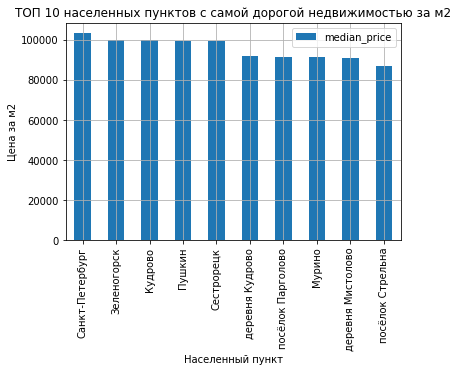

In [ ]:
top_ten = df_realt.pivot_table(index=['locality_name'], 
                              values='unit_price', 
                              aggfunc=['median', 'count'])
top_ten.columns = ['median_priсe', 'objects']

# Исключил из рейтинга населенные пункты, в которыех менее 10 объектов размещались за три года

top_ten = top_ten.query('objects >= 10') #
top_ten = top_ten.sort_values(by='median_priсe', ascending=False).head(10)
display(top_ten)

top_ten.plot(kind='bar',
y='median_priсe',
grid=True,
legend=True)
plt.title('ТОП 10 населенных пунктов с самой дорогой недвижимостью за м2')
plt.xlabel('Населенный пункт')
plt.ylabel('Цена за м2')
plt.show()

Поближе познакомимся с СПб и решим задачку с зависимостью цен от расстояния до центра:

In [ ]:
spb = df_realt.query('locality_name == "Санкт-Петербург"') #оставим только СПб
spb['cityCenters_nearest'] = spb['cityCenters_nearest'].round(decimals= -3)# округлим расстояние до 1 км

spb['area_price'] = '' 
def area_price(row): #функция принимает строку и возвращает медиану цены за метр для выбранного расстояния до центра
  dist = row['cityCenters_nearest']
  return spb.query('cityCenters_nearest == @dist')['unit_price'].median()

spb['area_price'] = spb.apply(area_price, axis = 1)
spb_chart = spb[['area_price', 'cityCenters_nearest']].drop_duplicates()



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

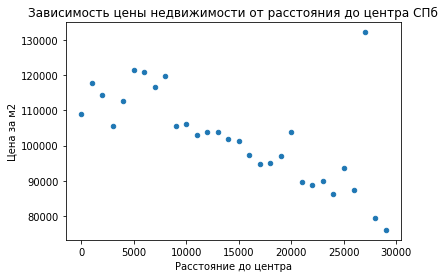

In [ ]:
spb_chart.plot(x= 'cityCenters_nearest', y= 'area_price', kind= 'scatter')
plt.title('Зависимость цены недвижимости от расстояния до центра СПб')
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена за м2')
plt.show()

Цена за квадратный метр растет с приближением к центру, до радиуса 7-8 км от выбранной геоточки центра. резко снижается с удаленностью более 25-27 км. Посмотрим, какое жилье предлагали в самом центре СПб:

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px">  
Как можно это расстояние (10 км) установить на основании графика, а не экспернтно?
    
на диаграмме рассеяния можно визуально выделить две границы - одна на уровне 7-8 км от центра, и другая на 20-25 км. Вероятно первая отделяет исторический центр, а вторая - город от пригорода. 
    

Для анализа центра в дальнейшем я делаю срез на 9 км от центра, и по нему делаю дальнейшие выводы

In [ ]:
spb.query('cityCenters_nearest < 9000').describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,3485.0,9.722525e+00,5.754614e+00,0.000000e+00,5.000000e+00,9.000000e+00,1.400000e+01,3.500000e+01
last_price,3485.0,8.916273e+06,3.813194e+06,1.600000e+06,6.040000e+06,8.100000e+06,1.109434e+07,1.999900e+07
total_area,3485.0,7.568549e+01,3.355413e+01,1.200000e+01,5.100000e+01,7.000000e+01,9.230000e+01,2.875000e+02
rooms,3485.0,2.546055e+00,1.208212e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.100000e+01
ceiling_height,3485.0,2.909920e+00,3.042848e-01,2.000000e+00,2.700000e+00,2.900000e+00,3.060000e+00,3.980000e+00
floors_total,3483.0,7.608384e+00,4.422082e+00,2.000000e+00,5.000000e+00,6.000000e+00,9.000000e+00,2.800000e+01
living_area,3485.0,4.480700e+01,2.381088e+01,2.000000e+00,2.870000e+01,4.040000e+01,5.580000e+01,1.837000e+02
floor,3485.0,4.315352e+00,3.150931e+00,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,2.400000e+01
kitchen_area,3468.0,1.251103e+01,6.337659e+00,2.000000e+00,8.400000e+00,1.100000e+01,1.500000e+01,1.007000e+02
balcony,3485.0,3.268293e-01,7.612044e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


почти полторы тысячи объектов. Относительно общего рынка - с высокими потолками (2,9) , без балконов, с кусочками зелени и каналами поблизости. Продаются объекты в центре за то же время, что и остальная недвижимость - три месяца, а вот цена почти на треть (28%) дороже. Общая и жилая площадь отличается незначительно, но в медианном объекте в центре все-же чуть просторнее. 

Ну и наконец можно собрать итоги нашего исследования и определить -какие факторы и как влияют на рыночную стоимость объектов недвижимости. Основным измерителем будем считать цену квадратного метра. 

In [ ]:
df_realt.query('ceiling_height >= 3')['unit_price'].median() / df_realt['unit_price'].median() #отношение медианной цены квадратного метра в квартирах с трехметровыми + потолками, к общей медиане рынка 

1.0949389

Высота потолков выше 3 м. увеличивает цену за квадратный метр на 16%

In [ ]:
df_realt.query('cityCenters_nearest <= 8000')['unit_price'].median() / df_realt['unit_price'].median() 

1.2393916

Расположение объекта в пределах 8 км от центра дает +22% к рыночной цене за метр. 



In [ ]:
df_realt.query('ponds_around3000 > 0 | parks_around3000 > 0')['unit_price'].median() / df_realt['unit_price'].median()

1.0841839

In [ ]:
df_realt.query('ponds_around3000 > 0 & parks_around3000 > 0')['unit_price'].median() / df_realt['unit_price'].median()

1.1084012

Пруд или парк рядом добавляют к цене 7,5%, а если повезло и парк сразу с прудом (или пруд с парком) - то еще пара процентов сверху!


In [ ]:
df_realt.groupby('floors_group')['unit_price'].median()

floors_group
другой       97321.429688
первый       80872.343750
последний    86138.617188
Name: unit_price, dtype: float32

In [ ]:
df_realt.query('floors_group != "другой"')['unit_price'].median() / df_realt.query('floors_group == "другой"')['unit_price'].median()

0.8542847

Упс! первый или последний этаж - и сразу дешевле на 13-17%

## Общий вывод
Ключевые факторы, влияющие на цену недвижимости в регионе:

1. Близость к центру (+ 30% к медианной цене)
2. Высота потолков (+16% к медианной цене при высоте от 3 м)
3. Первый или последний этаж (-15% от медианной цены на рынке)
4. Хотя-бы один парк или водоем рядом (+7-9%)

Рынок сформирован в основном Санкт-Петербургом, но хорошие объекты в хороших пригородах могут не уступать по ценам. 

Разница в ценах между городом и областью в статистически значимых (!) объектах может достигать х10

Рынок наиболее активен в начале весны. 

Объявления размещенные на выходных срабатывают в среднем хуже (но тут может играть роль фактор того что на выходных публикуют частные объявления, а в рабочее время подключаются профессиональные риэлторы)

Данных яндекс-недвижимости недосаточно для актуального анализа в динамике - сбор данных был на этапе роста проекта, единственный стабильный год - 2019, содержит только четыре полных месяца. Но в целом, если знать свежую медианную цену рынка (например за 2021 год), по результатам выполненного анализа можно достоверно установить рыночную цену по любому стандартному объекту.

Возможно именно из-за активного развития проекта во фрейме почти половина данных содержала статистические выбросы. 

Исследовательский анализ практически бесконечная штука - чем больше влезаешь в данные, тем больше гипотез:
- зависят ли пропуски в геоданных от года размещения? может их прикрутили позже?
- нет данных о годе постройки, наверняка они влияют
- как отличается выборка Яндекс-недвижимости от других площадок? кто не публикует объявления на Я-Н, влияет ли это на корректность выводов?
- высота потолков влияет на цену сама по себе, или потому что в центре объекты выше и цены дороже?

Но дедлайн уже прошел, и чеклист проекта заполнен. Пора отправлять на ревью.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. 
- [x] выполнено задание: "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод